In [46]:
import pandas as pd


In [47]:
# famous iris dataset
df = pd.read_csv(
    filepath_or_buffer='iris.csv',
    header=None,
    sep=','
)

df.columns=['id', 'sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df = df.drop([0])
df = df.drop(['id'], axis=1)

print(df.head())

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
print("x: ", X)
print("y: ", y)

  sepal_len sepal_wid petal_len petal_wid        class
1       5.1       3.5       1.4       0.2  Iris-setosa
2       4.9       3.0       1.4       0.2  Iris-setosa
3       4.7       3.2       1.3       0.2  Iris-setosa
4       4.6       3.1       1.5       0.2  Iris-setosa
5       5.0       3.6       1.4       0.2  Iris-setosa
x:  [['5.1' '3.5' '1.4' '0.2']
 ['4.9' '3.0' '1.4' '0.2']
 ['4.7' '3.2' '1.3' '0.2']
 ['4.6' '3.1' '1.5' '0.2']
 ['5.0' '3.6' '1.4' '0.2']
 ['5.4' '3.9' '1.7' '0.4']
 ['4.6' '3.4' '1.4' '0.3']
 ['5.0' '3.4' '1.5' '0.2']
 ['4.4' '2.9' '1.4' '0.2']
 ['4.9' '3.1' '1.5' '0.1']
 ['5.4' '3.7' '1.5' '0.2']
 ['4.8' '3.4' '1.6' '0.2']
 ['4.8' '3.0' '1.4' '0.1']
 ['4.3' '3.0' '1.1' '0.1']
 ['5.8' '4.0' '1.2' '0.2']
 ['5.7' '4.4' '1.5' '0.4']
 ['5.4' '3.9' '1.3' '0.4']
 ['5.1' '3.5' '1.4' '0.3']
 ['5.7' '3.8' '1.7' '0.3']
 ['5.1' '3.8' '1.5' '0.3']
 ['5.4' '3.4' '1.7' '0.2']
 ['5.1' '3.7' '1.5' '0.4']
 ['4.6' '3.6' '1.0' '0.2']
 ['5.1' '3.3' '1.7' '0.5']
 ['4.8' '3.4' '1.9

Standardize the data

In [48]:
from sklearn.preprocessing import StandardScaler


In [49]:
X_std = StandardScaler().fit_transform(X)
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

Find covariance matrix

In [50]:
import numpy as np

In [51]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Perform matrix eigendecomposition on the covariance matrix

In [52]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


Sorting eigenpairs based on the eigen values


In [53]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589318
0.9274036215173415
0.1483422264816396
0.020746013995595936


Variance
after sorting we have to determine how many principal components are we going to choose for our new feature
one of the measures: explained variance - tells us how much info can be attributed to each of the principal components

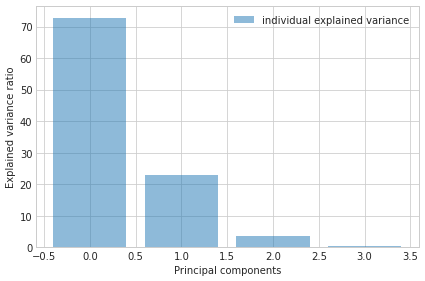

In [54]:
from matplotlib import pyplot as plt

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')

    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

the bar chart above shows us about 72% of the variance can be explained from the pc1 and around 22% can be explained from the pc2
while the pc3 and pc4 can be safely dropped

Create a feature matrix from the eigenvector from pc1 and pc2

In [55]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


find the Y values to plot with Y = X * W 

In [56]:
Y = X_std.dot(matrix_w)
Y

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

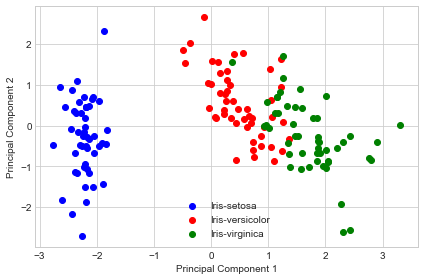

In [57]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()